# A Regressão Linear
- Se temos um conjunto de pontos como o mostrado abaixo, podemos traçar qualquer reta que passa por esses pontos
    - Nesse caso, vamos traçar uma reta y = x
<img src="https://drive.google.com/uc?id=1MAvsj8-PiAjITiZ5CLznoJAii9fANYxN" style="width: 400px;"/>
- Infinitas retas podem ser traçadas, mas qual seria <font color='blue'>**a melhor reta**</font> que passa por esses pontos?
<img src="https://drive.google.com/uc?id=1Da2PIitlCgvH1YLOYucImVZtffjQwbwv" style="width: 400px;"/>
- <font color='blue'>**a melhor reta:**</font> o que seria "melhor"?
    - Para definir esse conceito podemos, por exemplo, verificar a distância de cada ponto a essa reta vermelha e escolher baseado nessa distância
<img src="https://drive.google.com/uc?id=14p9ICVUjch8wXoMuz2rIaxK2_7_VwewI" style="width: 500px;"/>
- A **regressão vai traçar essa reta de forma a <font color='blue'>minimizar a soma dos erros ao quadrado**</font>, segundo a própria documentação
    - https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
<img src="https://drive.google.com/uc?id=1hs6fc1WHOk6eF66MfarlmwGhxtWurUQb" style="width: 400px;"/>

In [20]:
# Podemos considerar esses dados abaixo
import pandas as pd 

dados = pd.DataFrame({
    'X': [1,2,3,4,5],
    'Y': [1.3,1.8,3.5,4,4.6]
})

dados.head(2)

,X,Y
0,1,1.3
1,2,1.8


In [21]:
dados.head(3)

,X,Y
0,1,1.3
1,2,1.8
2,3,3.5


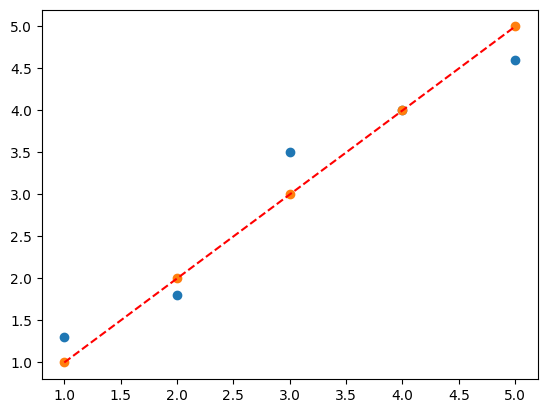

In [38]:
# Visualizando esses pontos graficamente, podemos traçar uma reta que passa por esse pontos
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')
ax.scatter(dados.X,dados.y_reta)

plt.show()

In [44]:
# Nessa reta vermelha, fizemos que y = x, então podemos escrever o y_reta como
dados['y_reta'] = dados.X
dados

,X,Y,y_reta,y_pred,erro_reta,erro_pred
0,1,1.3,1,1.28,0.09,0.0004
1,2,1.8,2,2.16,0.04,0.1296
2,3,3.5,3,3.04,0.25,0.2116
3,4,4.0,4,3.92,0.00,0.0064
4,5,4.6,5,4.80,0.16,0.0400


- **Vamos usar a regressão linear para traçar a melhor reta que passa por esses pontos**
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [24]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [25]:
# Criando o regressor
reg = LinearRegression().fit(dados.X.values.reshape(-1, 1),dados.Y)

In [26]:
# Visualizando o coeficiente angular
a = reg.coef_[0]

In [27]:
# e o coeficiente linear
b = reg.intercept_

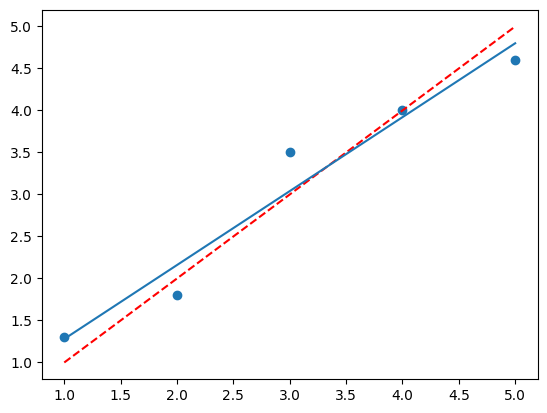

In [28]:
# Visualizando graficamente
fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')

x = dados.X.values
y = a*x+b
ax.plot(x,y)

plt.show()

In [29]:
# Fazendo a previsão e adicionando na base
dados['y_pred'] = reg.predict(dados.X.values.reshape(-1,1))

In [30]:
dados

,X,Y,y_reta,y_pred
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [31]:
# Calculando o erro da reta vermelha e da regressão
dados['erro_reta'] = (dados.Y - dados.y_reta)**2
dados['erro_pred'] = (dados.Y - dados.y_pred)**2

In [48]:
# Verificando essa base e a soma do erro
dados[['erro_reta','erro_pred']].mean()

erro_reta    0.1080
erro_pred    0.0776
dtype: float64

- Pdemos utilizar o erro médio absoluto e o erro médio quadrático do próprio scikit-learn para calcular esses erros
    - https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [32]:
# Além disso, também podemos usar o erro médio absoluto e o erro médio quadrático do próprio scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [33]:
# Visualizando o resultado da previsão
print(mean_absolute_error(dados.Y,dados.y_reta))
print(mean_squared_error(dados.Y,dados.y_reta))
print(mean_absolute_error(dados.Y,dados.y_pred))
print(mean_squared_error(dados.Y,dados.y_pred))

0.2800000000000001
0.10800000000000005
0.22400000000000028
0.07760000000000009


### Usando a Regressão Linear de forma prática
- **Vamos utilizar o dataset de casas da Califórnia**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [43]:
# Importando o dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True).frame

/Users/wilsonsantos/Documents/machine learning algorithm/venv/lib/python3.14/site-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1081)>

In [37]:
# Visualizando
data

NameError: name 'data' is not defined

In [39]:
# Transformando em um DataFrame
casas = pd.DataFrame(data.data)
casas.columns = data.feature_names
casas['MedHouseVal'] = data.target

NameError: name 'data' is not defined

In [40]:
# Visualizando o dataframe
casas

NameError: name 'casas' is not defined

- **Regressão Linear Simples**

In [41]:
# Separando X e Y
X = casas.MedInc
y = casas.MedHouseVal

NameError: name 'casas' is not defined

- Separando nossa base em treino e teste para criarmos o modelo
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [42]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'X' is not defined

In [82]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train.values.reshape(-1, 1),y_train)

In [83]:
# Avaliando o erro
y_pred = reg.predict(X_test.values.reshape(-1,1))

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6265986453094173
0.7028461448540978


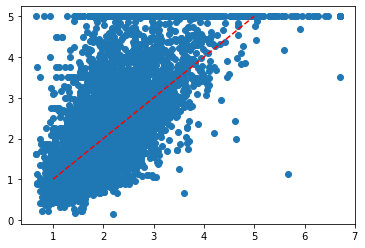

In [84]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')

plt.show()

<a id='linear_multipla'></a>
- **Regressão Linear Múltipla**

- Primeiro fazendo para apenas duas variáveis

In [71]:
# Separando X e Y
X = casas.drop('MedHouseVal',axis=1)
y = casas.MedHouseVal

In [72]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train,y_train)

In [74]:
# Da mesma forma, também vamos ter o coef_
reg.coef_

array([ 4.44870466e-01,  9.55004561e-03, -1.21991503e-01,  7.79144696e-01,
       -7.68990809e-08, -3.29948505e-03, -4.19131153e-01, -4.34103468e-01])

In [75]:
# E o intercept_
reg.intercept_

-37.082010939079815

In [76]:
# Avaliando o erro
y_pred = reg.predict(X_test)

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.5295710106684454
0.5369686543372454


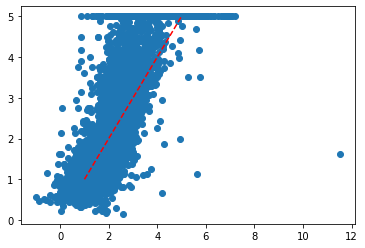

In [78]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred,y_test)
ax.plot([1,5],[1,5],'--r')

plt.show()

- Podemos [voltar](#linear_multipla) e considerar qualquer coluna para o modelo